In [148]:
import requests
from bs4 import BeautifulSoup as bs
from selenium import webdriver  
import pandas as pd
import re
from sklearn.cluster import KMeans
from sklearn import neighbors
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from scipy.cluster.vq import kmeans, vq
from pylab import plot, show
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns


## GoodRead Data From web

In [122]:
import requests
from bs4 import BeautifulSoup

base_url = 'https://www.goodreads.com/list/show/264.Books_That_Everyone_Should_Read_At_Least_Once?page=1'
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'
}

response = requests.get(base_url, headers=headers)
soup = BeautifulSoup(response.text, 'html.parser')
response


<Response [200]>

In [123]:
print(type(soup))
#soup

<class 'bs4.BeautifulSoup'>


In [124]:
page_number = 1

In [125]:
# Function to get the soup object for a given URL
def get_soup(url):
    response = requests.get(url)
    if response.status_code == 200:
        return BeautifulSoup(response.text, 'html.parser')
    else:
        return None

In [126]:
import requests
from bs4 import BeautifulSoup

# Function to get the soup object for a given URL with headers
def get_soup(url):
    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'
    }
    response = requests.get(url, headers=headers)
    if response.status_code == 200:
        return BeautifulSoup(response.text, 'html.parser')
    else:
        print(f"Failed to fetch page: {response.status_code}")
        return None

# Base URL for the Goodreads list
base_url = 'https://www.goodreads.com/list/show/264.Books_That_Everyone_Should_Read_At_Least_Once?page='
page_number = 1

# Initialize lists to store the collected data
all_authors = []
all_book_titles = []
all_reviews = []
all_ratings_count = []

# Loop to navigate through pages
while True:
    # Construct the URL for the current page
    url = f"{base_url}{page_number}"
    print(f"Fetching page: {url}")

    # Get the soup object for the current page
    soup = get_soup(url)
    if not soup:
        break  # Exit loop if there was an issue fetching the page

    # Extract author names
    author_containers = soup.find_all('a', class_='authorName')
    for container in author_containers:
        author_name = container.find('span')
        if author_name:
            all_authors.append(author_name.text.strip())

    # Extract book titles
    bookTitle_containers = soup.find_all('a', class_='bookTitle')
    for container in bookTitle_containers:
        bookTitle_span = container.find('span')
        if bookTitle_span:
            all_book_titles.append(bookTitle_span.text.strip())

    # Extract reviews
    review_containers = soup.find_all('span', class_='minirating')
    for container in review_containers:
        if container:
            rating_text = container.text.strip()
            # Split the text to extract the rating part
            avg_rating = rating_text.split(' avg rating')[0]
            all_reviews.append(avg_rating)

    # Extract the number of ratings
        ratings_match = re.search(r'\d[\d,]* ratings', rating_text)
        if ratings_match:
            number_of_ratings = ratings_match.group()
            all_ratings_count.append(number_of_ratings)

    # Check for a "next page" link or button, if it doesn't exist, break the loop
    next_page = soup.find('a', class_='next_page')
    if next_page:
        #if page_number == 5:
            #break
        page_number += 1
    
    else:
        break

# Print the collected data
# print("Authors:")
# for author in all_authors:
#     print(author)

# print("\nBook Titles:")
# for title in all_book_titles:
#     print(title)

# print("\nReviews:")
# for review in all_reviews:
#     print(review)


Fetching page: https://www.goodreads.com/list/show/264.Books_That_Everyone_Should_Read_At_Least_Once?page=1
Fetching page: https://www.goodreads.com/list/show/264.Books_That_Everyone_Should_Read_At_Least_Once?page=2
Fetching page: https://www.goodreads.com/list/show/264.Books_That_Everyone_Should_Read_At_Least_Once?page=3
Fetching page: https://www.goodreads.com/list/show/264.Books_That_Everyone_Should_Read_At_Least_Once?page=4
Fetching page: https://www.goodreads.com/list/show/264.Books_That_Everyone_Should_Read_At_Least_Once?page=5


In [ ]:
#reviews---> number of people
#rainting--->

In [53]:
#all_ratings_count

In [31]:
#all_reviews

In [39]:
#goodreadsDF.to_csv("goodreads.csv", index=False)

## Parepar data to model

In [127]:
data = {
    'Book_titles': all_authors,
    'AuthorName': all_book_titles,
    'Ratings':all_reviews,
    'Review':all_ratings_count  
      
}

In [128]:
df = pd.DataFrame(data)

In [129]:
df['Ratings']=df['Ratings'].apply(lambda x: x.split(" ")[0].replace(',', ''))

In [130]:
df

,Book_titles,AuthorName,Ratings,Review
0,Harper Lee,To Kill a Mockingbird,4.26,"6,183,465 ratings"
1,J.K. Rowling,Harry Potter and the Sorcerer’s Stone (Harry P...,4.47,"10,152,865 ratings"
2,Jane Austen,Pride and Prejudice,4.29,"4,303,448 ratings"
3,Anne Frank,The Diary of a Young Girl,4.19,"3,765,878 ratings"
4,George Orwell,Animal Farm,3.99,"3,927,256 ratings"
...,...,...,...,...
495,Yuval Noah Harari,Sapiens: A Brief History of Humankind,4.36,"1,045,053 ratings"
496,Ben Peller,To Live and Drink in L.A.,3.96,459 ratings
497,John Berendt,Midnight in the Garden of Good and Evil,3.92,"272,626 ratings"
498,Lionel Shriver,We Need to Talk About Kevin,4.08,"196,422 ratings"


In [131]:
df.dtypes

Book_titles    object
AuthorName     object
Ratings        object
Review         object
dtype: object

In [132]:
# Extract the integer part of the rating, handle NaN, and convert to int
df['Ratings'] = df['Ratings'].str.extract('(\d+)').fillna(0).astype(float)

In [133]:
import numpy as np 
trial = df[['Ratings']]
data = np.asarray([np.asarray(trial['Ratings'])]).T

In [134]:
df["Ratings"]

0      4.0
1      4.0
2      4.0
3      4.0
4      3.0
      ... 
495    4.0
496    3.0
497    3.0
498    4.0
499    4.0
Name: Ratings, Length: 500, dtype: float64

In [135]:
df.dtypes

Book_titles     object
AuthorName      object
Ratings        float64
Review          object
dtype: object

## Prepare train 

In [18]:

# X = data
# distortions = []
# for k in range(2,30):
#     k_means = KMeans(n_clusters = k)
#     k_means.fit(X)
#     distortions.append(k_means.inertia_)

# fig = plt.figure(figsize=(15,10))
# plt.plot(range(2,30), distortions, 'bx-')
# plt.title("Elbow Curve")

# # sacle the data
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)

In [136]:
# Prepare data
X = data

# sacle the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [137]:
#df[df['Ratings'] == 'really']

Buliding the Model

In [138]:
wcss = []
for i in range(1,10):  # Test 1 to 10 clusters
    kmeans = KMeans(n_clusters=i,
                    init='k-means++',
                    max_iter=300,
                    n_init=10,
                    random_state=0)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)  # inertia_ is the WCSS

c:\Users\Raghad Alharbi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1474: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (4). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
c:\Users\Raghad Alharbi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1474: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (5). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
c:\Users\Raghad Alharbi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1474: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (6). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
c:\Users\Raghad Alharbi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1474: ConvergenceWarning: Number of distinct clusters (3) found smal

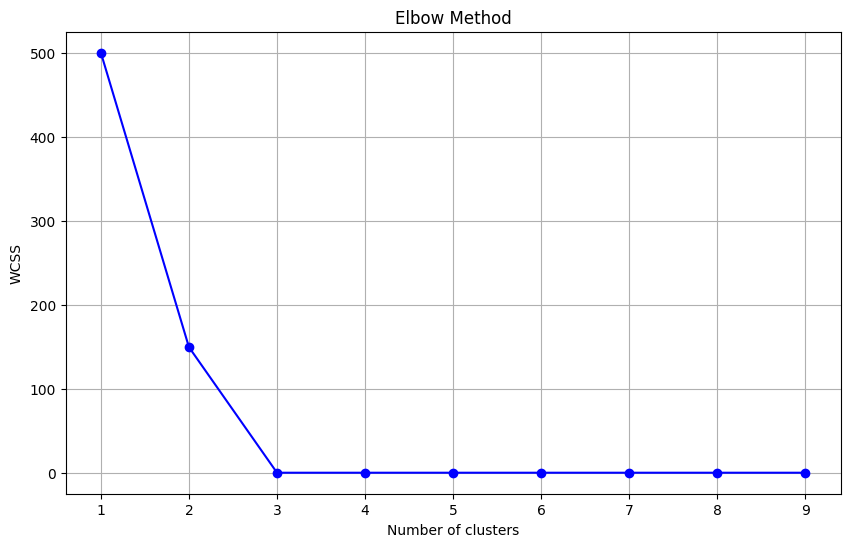

In [139]:
# 3. Plot the Elbow Curve
plt.figure(figsize=(10, 6))
plt.plot(range(1,10), wcss,  marker='o', linestyle='-', color='b')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [140]:
# Optional: Apply k-Means using the optimal number of clusters
optimal_clusters = 2 # This might change based on your actual elbow curve analysis
model = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)

Train and Test the Model

In [141]:
# Fit the model on the training data
y_pred = model.fit_predict(X_scaled)

In [25]:
#df.drop(df[df['Ratings'] == 'really liked it 4.00'].index, inplace=True)

In [42]:
#df.drop(df[df['Ratings'] == 'it was ok 2.00'].index, inplace=True)

In [43]:
#df.drop(df[df['Ratings'] == 'it was amazing 5.00'].index, inplace=True)

In [142]:
#df[df['Ratings'] == 'really']

In [143]:
#df[df['Ratings'] == 'really']

In [144]:
#df[df['Ratings'] == 'really liked it 4.00']

In [145]:
df['kmeans'] = y_pred

In [146]:
df['kmeans'].value_counts()

kmeans
0    330
1    170
Name: count, dtype: int64

In [147]:
df[df['kmeans']==0]

,Book_titles,AuthorName,Ratings,Review,kmeans
0,Harper Lee,To Kill a Mockingbird,4.0,"6,183,465 ratings",0
1,J.K. Rowling,Harry Potter and the Sorcerer’s Stone (Harry P...,4.0,"10,152,865 ratings",0
2,Jane Austen,Pride and Prejudice,4.0,"4,303,448 ratings",0
3,Anne Frank,The Diary of a Young Girl,4.0,"3,765,878 ratings",0
5,Antoine de Saint-Exupéry,The Little Prince,4.0,"2,132,773 ratings",0
...,...,...,...,...,...
491,Peggy Parish,"Amelia Bedelia (Amelia Bedelia, #1)",4.0,"90,178 ratings",0
494,Jon Scieszka,The Stinky Cheese Man and Other Fairly Stupid ...,4.0,"95,035 ratings",0
495,Yuval Noah Harari,Sapiens: A Brief History of Humankind,4.0,"1,045,053 ratings",0
498,Lionel Shriver,We Need to Talk About Kevin,4.0,"196,422 ratings",0


In [152]:
X

array([[4.],
       [4.],
       [4.],
       [4.],
       [3.],
       [4.],
       [4.],
       [3.],
       [3.],
       [4.],
       [4.],
       [4.],
       [4.],
       [3.],
       [3.],
       [4.],
       [4.],
       [4.],
       [4.],
       [4.],
       [4.],
       [4.],
       [4.],
       [3.],
       [3.],
       [4.],
       [4.],
       [3.],
       [4.],
       [4.],
       [4.],
       [4.],
       [4.],
       [4.],
       [4.],
       [4.],
       [4.],
       [3.],
       [4.],
       [4.],
       [3.],
       [4.],
       [4.],
       [4.],
       [4.],
       [4.],
       [4.],
       [3.],
       [4.],
       [4.],
       [4.],
       [4.],
       [4.],
       [4.],
       [4.],
       [4.],
       [4.],
       [4.],
       [4.],
       [4.],
       [3.],
       [3.],
       [3.],
       [4.],
       [3.],
       [4.],
       [4.],
       [4.],
       [4.],
       [4.],
       [4.],
       [3.],
       [4.],
       [3.],
       [3.],
       [3.],
       [3.],